# PFD overtime graph

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
names_processed = pd.read_csv('death_info_2022-06-23_processed.csv')
names_processed.head()

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
0,0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...
1,1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...
2,2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...
3,3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...
4,4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...


In [11]:
names_processed['year'] = names_processed['ref'].str[:4]
names_processed['year'] = pd.to_numeric(names_processed['year'] )
display(names_processed.head())

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,year
0,0,26 May 2022,2022-0155,SR,James Bennett,Birmingham and Solihull,State Custody related deaths | Mental Health r...,Ministry of Justice and Birmingham and Solihul...,https://www.judiciary.uk/publications/saifur-r...,2022.0
1,1,25 May 2022,2022-0154,RG,Kate Sutherland,North Wales (East & Central),Emergency services related deaths (2019 onward...,Welsh Ambulance NHS Foundation Trust and Betsi...,https://www.judiciary.uk/publications/raymond-...,2022.0
2,2,24 May 2022,2022-0153,MW,Jacqueline Lake,Norfolk,Hospital Death (Clinical Procedures and medica...,Queen Elizabeth Hospital King’s Lynn NHS Found...,https://www.judiciary.uk/publications/michael-...,2022.0
3,3,12 May 2022,2022-0152,PK,Joanne Andrews,North East Kent,Hospital Death (Clinical Procedures and medica...,Kent and Medway NHS Social Care Partnership Tr...,https://www.judiciary.uk/publications/pauline-...,2022.0
4,4,19 May 2022,2022-0151,SG,Tom Osborne,Milton Keynes,Hospital Death (Clinical Procedures and medica...,Milton Keyne University Hospital and Secretary...,https://www.judiciary.uk/publications/sangeert...,2022.0


In [12]:
display(names_processed[names_processed['year']>2022])
display(names_processed[names_processed['year']<2013])

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,year
3791,3792,3 February 2014,2104-0049,DJ,Stephen Nicholls,Dorset,Road (Highways Safety) related deaths,NaN,https://www.judiciary.uk/publications/daniel-j...,2104.0


,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url,year
2663,2664,4 March 2016,20016-0092,LG,John Pollard,Manchester South,Community health care and emergency services r...,Greater Manchester Fire and Rescue Service,https://www.judiciary.uk/publications/lee-gaunt/,2001.0
2798,2799,24 November 2015,0467-2015,TB,Wendy James,Gwent,State Custody related deaths,HMP Usk,https://www.judiciary.uk/publications/thomas-b...,467.0


In [13]:
year_count = names_processed.groupby(['year']).count()
display(year_count)

,Unnamed: 0,date_of_report,ref,deceased_name,coroner_name,coroner_area,category,this_report_is_being_sent_to,url
year,,,,,,,,,
467.0,1,1,1,1,1,1,1,1,1
2001.0,1,1,1,1,1,1,1,1,1
2013.0,180,180,180,180,180,180,180,1,180
2014.0,566,566,566,566,566,566,565,8,566
2015.0,433,433,433,433,433,433,433,107,433
2016.0,471,471,471,471,470,471,471,471,471
2017.0,441,440,441,441,441,441,441,441,441
2018.0,386,384,386,385,386,386,385,386,386
2019.0,523,523,523,521,523,523,523,521,523


In [14]:
x = range(2013, 2023)

In [15]:
year_count = year_count[['Unnamed: 0']]
year_count.rename(columns = {'Unnamed: 0': 'Count'}, inplace = True)
year_count.loc[2016, 'Count'] = year_count.loc[2016, 'Count'] +1 # 2001
year_count.loc[2015, 'Count'] = year_count.loc[2015, 'Count'] +1 # 0467-2015
year_count.loc[2014, 'Count'] = year_count.loc[2014, 'Count'] +1 # 2104
year_count = year_count[2013:2023]
year_count.reset_index(inplace = True)
y = year_count['Count']

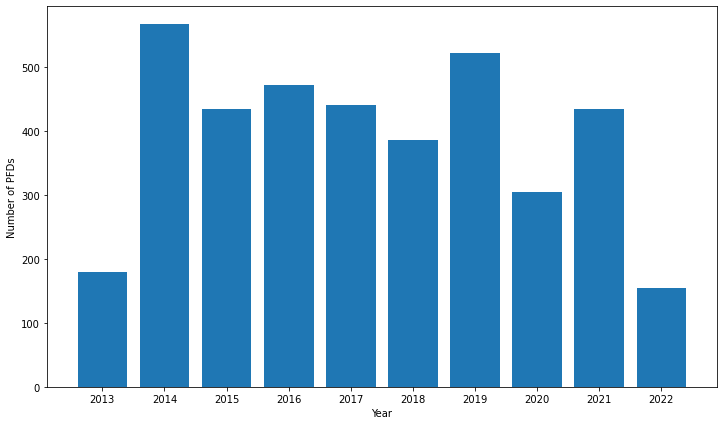

In [16]:
plt.figure(figsize = (12, 7))
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Number of PFDs')
plt.xticks(np.arange(2013, 2023))
plt.savefig('PFDs over time 2022-06-22.png')
plt.show()